In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/weatherAUS.csv")
df.shape

(145460, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.describe(exclude=[object])

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
df.describe(include=[object])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [ ]:
categorical_features = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
df[categorical_features].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [ ]:
categorical_features_with_null = [feature for feature in categorical_features if df[feature].isnull().sum()]
print(categorical_features_with_null)
for each_feature in categorical_features_with_null:
    mode_val = df[each_feature].mode()[0]
    df[each_feature].fillna(mode_val,inplace=True)

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
numerical_features = [column_name for column_name in df.columns if df[column_name].dtype != 'O']
df[numerical_features].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

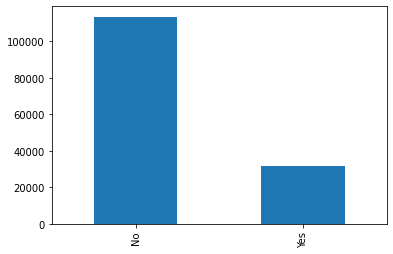

In [ ]:
# print(df['RainTomorrow'].value_counts().sum())
df['RainTomorrow'].value_counts().plot(kind='bar')

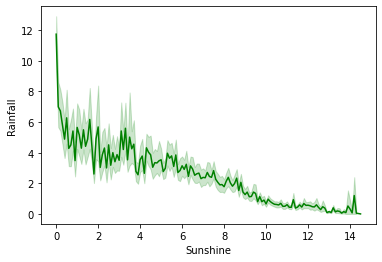

In [ ]:
sns.lineplot(data=df,x='Sunshine',y='Rainfall',color='green')

In [ ]:
def encode_data(feature_name):

    ''' 

    This function takes feature name as a parameter and returns mapping dictionary to replace(or map) categorical data with numerical data.

    '''

    mapping_dict = {}

    unique_values = list(df[feature_name].unique())

    for idx in range(len(unique_values)):

        mapping_dict[unique_values[idx]] = idx

    return mapping_dict




df['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)

df['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)

df['WindGustDir'].replace(encode_data('WindGustDir'),inplace = True)

df['WindDir9am'].replace(encode_data('WindDir9am'),inplace = True)

df['WindDir3pm'].replace(encode_data('WindDir3pm'),inplace = True)

df['Location'].replace(encode_data('Location'), inplace = True)

df["Date"] = df['Date'].str.replace('-', '').astype(float) 

In [ ]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,20081201.0,0,13.4,22.9,0.6,NaN,NaN,0,44.0,0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,20081202.0,0,7.4,25.1,0.0,NaN,NaN,1,44.0,1,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,20081203.0,0,12.9,25.7,0.0,NaN,NaN,2,46.0,0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,20081204.0,0,9.2,28.0,0.0,NaN,NaN,3,24.0,2,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,20081205.0,0,17.5,32.3,1.0,NaN,NaN,0,41.0,3,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,20170621.0,48,2.8,23.4,0.0,NaN,NaN,14,31.0,2,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0
145456,20170622.0,48,3.6,25.3,0.0,NaN,NaN,4,22.0,2,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0
145457,20170623.0,48,5.4,26.9,0.0,NaN,NaN,5,37.0,2,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0
145458,20170624.0,48,7.8,27.0,0.0,NaN,NaN,12,28.0,5,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [ ]:
df.shape

(58236, 23)

In [ ]:
def clean_dataset(df):
    assert isinstance (df, pd.DataFrame)
    df.dropna(inplace=True)
    indices_to_keep=~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
df=clean_dataset(df)

df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,20090101.0,2.0,17.9,35.2,0.0,12.0,12.3,15.0,48.0,3.0,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0.0,0.0
6050,20090102.0,2.0,18.4,28.9,0.0,14.8,13.0,10.0,37.0,5.0,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0.0,0.0
6052,20090104.0,2.0,19.4,37.6,0.0,10.8,10.6,6.0,46.0,15.0,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0.0,0.0
6053,20090105.0,2.0,21.9,38.4,0.0,11.4,12.2,1.0,31.0,14.0,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0.0,0.0
6054,20090106.0,2.0,24.2,41.0,0.0,11.2,8.4,1.0,35.0,13.0,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,20170620.0,46.0,19.3,33.4,0.0,6.0,11.0,8.0,35.0,2.0,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0.0,0.0
142299,20170621.0,46.0,21.2,32.6,0.0,7.6,8.6,14.0,37.0,2.0,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0.0,0.0
142300,20170622.0,46.0,20.7,32.8,0.0,5.6,11.0,14.0,33.0,12.0,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0.0,0.0
142301,20170623.0,46.0,19.5,31.8,0.0,6.2,10.6,13.0,26.0,2.0,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0.0,0.0


In [ ]:
# df.info()
print(df.columns)

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


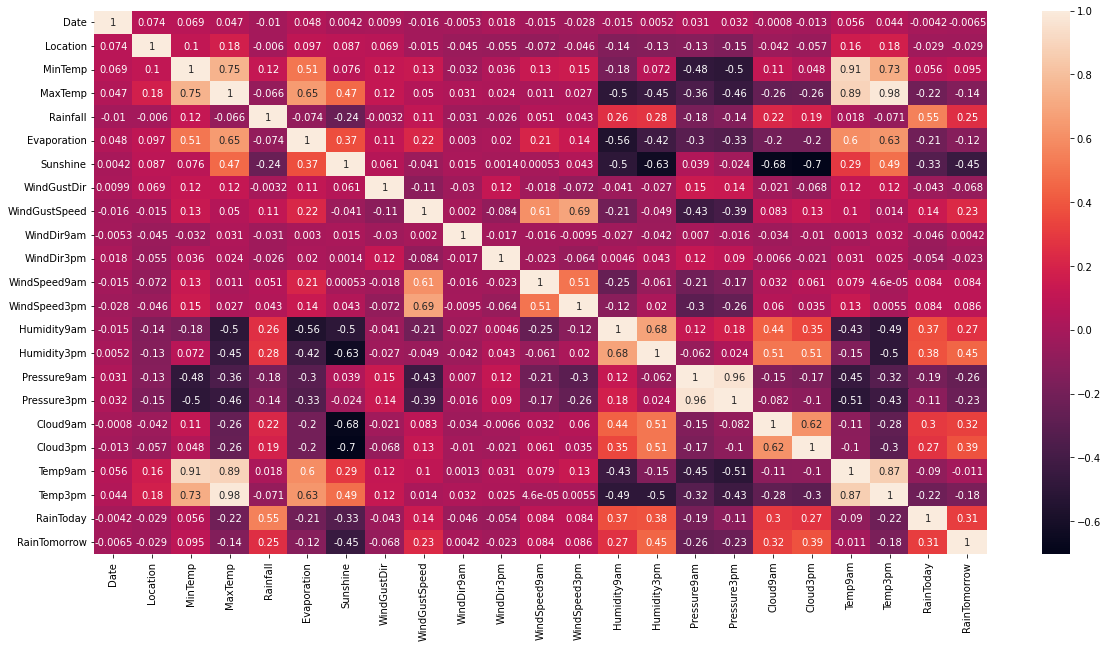

In [ ]:
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor,annot=True)

In [ ]:
X = df.drop(['RainTomorrow','Date'],axis=1)
y = df['RainTomorrow']
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
6049,2.0,17.9,35.2,0.0,12.0,12.3,15.0,48.0,3.0,10.0,...,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0.0
6050,2.0,18.4,28.9,0.0,14.8,13.0,10.0,37.0,5.0,5.0,...,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0.0
6052,2.0,19.4,37.6,0.0,10.8,10.6,6.0,46.0,15.0,8.0,...,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0.0
6053,2.0,21.9,38.4,0.0,11.4,12.2,1.0,31.0,14.0,1.0,...,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0.0
6054,2.0,24.2,41.0,0.0,11.2,8.4,1.0,35.0,13.0,0.0,...,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [ ]:
print("Length of Training Data: {}".format(len(X_train)))
print("Length of Testing Data: {}".format(len(X_test)))

Length of Training Data: 46588
Length of Testing Data: 11648


In [ ]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

In [ ]:
predictions = lm.predict(X_train)
y_train_pred = pd.DataFrame(predictions, columns=['Predicted Apparent Temperature (C)'])

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Mean Squred Error
mse = mean_squared_error(y_train, y_train_pred)
print('Mean squared error(Train) :', round(mse, 4))

# Root Mean Squared Error
rmsq = sqrt(mean_squared_error(y_train, y_train_pred))
print('Root mean squared error(Train) :', round(rmsq, 4))

# Accuracy
score = lm.score(X_train, y_train)
print('Explained variance of the predictions(Train) :', round(2*score * 100, 4))

Mean squared error(Train) : 0.1085
Root mean squared error(Train) : 0.3295
Explained variance of the predictions(Train) : 72.907


In [ ]:
predictions = lm.predict(X_test)
y_pred = pd.DataFrame(predictions, columns=['Predicted Apparent Temperature (C)'])
# Mean Squred Error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error(Testing) :', round(mse, 4))

# Root Mean Squared Error
rmsq = sqrt(mean_squared_error(y_test, y_pred))
print('Root mean squared error(Testing) :', round(rmsq, 4))

# Accuracy
score = lm.score(X_test, y_test)
print('Explained variance of the predictions(Testing) :', round(2*score * 100, 4))

Mean squared error(Testing) : 0.1085
Root mean squared error(Testing) : 0.3294
Explained variance of the predictions(Testing) : 72.9338


### LASSO Algorithm

### Find the Best Hyperparamter(Alpha) Value

In [ ]:
from multiprocessing.spawn import import_main_path
from numpy import arange
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
model = LassoCV(alphas=arange(0, 1, 0.001), cv=cv, n_jobs=-1)
# fit model
model.fit(X_train, y_train)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

alpha: 0.000000


### Plug In the best Alpha value to fit the LASSO Model and Predict

In [ ]:
# evaluate an lasso regression model on the dataset
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from math import sqrt

# define model
lasso_model = Lasso(alpha=0.0)
lasso_model.fit(X_train, y_train)

lasso_predictions_train = lasso_model.predict(X_train)
y_train_pred_lasso = pd.DataFrame(lasso_predictions_train, columns=['Predicted Apparent Temperature (C)'])

# Mean Squred Error
mse = mean_squared_error(y_train, y_train_pred_lasso)
print('Mean squared error(Train) :', round(mse, 4))

# Root Mean Squared Error
rmsq = sqrt(mean_squared_error(y_train, y_train_pred_lasso))
print('Root mean squared error(Train) :', round(rmsq, 4))

# Accuracy
score = lasso_model.score(X_train, y_train)
print('Explained variance of the predictions(Train) :', round(2*score * 100, 4))

print()
print()
print()

lasso_predictions_test = lasso_model.predict(X_test)
y_pred = pd.DataFrame(lasso_predictions_test, columns=['Predicted Apparent Temperature (C)'])
# Mean Squred Error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error(Testing) :', round(mse, 4))

# Root Mean Squared Error
rmsq = sqrt(mean_squared_error(y_test, y_pred))
print('Root mean squared error(Testing) :', round(rmsq, 4))

# Accuracy
score = lasso_model.score(X_test, y_test)
print('Explained variance of the predictions(Testing) :', round(2*score * 100, 4))

Mean squared error(Train) : 0.1085
Root mean squared error(Train) : 0.3295
Explained variance of the predictions(Train) : 72.907



Mean squared error(Testing) : 0.1085
Root mean squared error(Testing) : 0.3294
Explained variance of the predictions(Testing) : 72.9338


<p>A problem with linear regression is that estimated coefficients of the model can become large, making the model sensitive to inputs and possibly unstable. This is particularly true for problems with few observations (samples) or less samples (n) than input predictors (p) or variables (so-called p >> n problems)</p>
<p>In our Case, the dataset has n >> p and the coeffecients of the Linear Regression model are not very large! Which resulted in the accuracy of Lasso Regression to be similar to the Linear Regression Model</p>

###Ridge Regression

In [ ]:
from multiprocessing.spawn import import_main_path
from numpy import arange
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
model = RidgeCV(alphas=arange(0, 1, 0.01), cv=cv)
# fit model
model.fit(X_train, y_train)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

alpha: 0.990000


### Plug In the best Alpha value to fit the Ridge Model and Predict

In [ ]:
# evaluate an Ridge regression model on the dataset
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from math import sqrt

# define model
ridge_model = RidgeCV(alphas=0.99)
ridge_model.fit(X_train, y_train)

ridge_predictions_train = ridge_model.predict(X_train)
y_train_pred_ridge = pd.DataFrame(ridge_predictions_train, columns=['Predicted Apparent Temperature (C)'])

# Mean Squred Error
mse = mean_squared_error(y_train, y_train_pred_ridge)
print('Mean squared error(Train) :', round(mse, 4))

# Root Mean Squared Error
rmsq = sqrt(mean_squared_error(y_train, y_train_pred_ridge))
print('Root mean squared error(Train) :', round(rmsq, 4))

# Accuracy
score = ridge_model.score(X_train, y_train)
print('Explained variance of the predictions(Train) :', round(2*score * 100, 4))

print()
print()
print()

ridge_predictions_test = ridge_model.predict(X_test)
y_pred = pd.DataFrame(ridge_predictions_test, columns=['Predicted Apparent Temperature (C)'])
# Mean Squred Error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error(Testing) :', round(mse, 4))

# Root Mean Squared Error
rmsq = sqrt(mean_squared_error(y_test, y_pred))
print('Root mean squared error(Testing) :', round(rmsq, 4))

# Accuracy
score = lasso_model.score(X_test, y_test)
print('Explained variance of the predictions(Testing) :', round(2*score * 100, 4))

Mean squared error(Train) : 0.1085
Root mean squared error(Train) : 0.3295
Explained variance of the predictions(Train) : 72.9074



Mean squared error(Testing) : 0.1085
Root mean squared error(Testing) : 0.3294
Explained variance of the predictions(Testing) : 72.9332
